In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../../')
import utils


In [2]:
CALIBRATION_FILE = '../../../../../calibration/out/C.mat'
DATA_FILE = '../../../../../experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_14.09.49_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2017/6/5  14:9:49
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



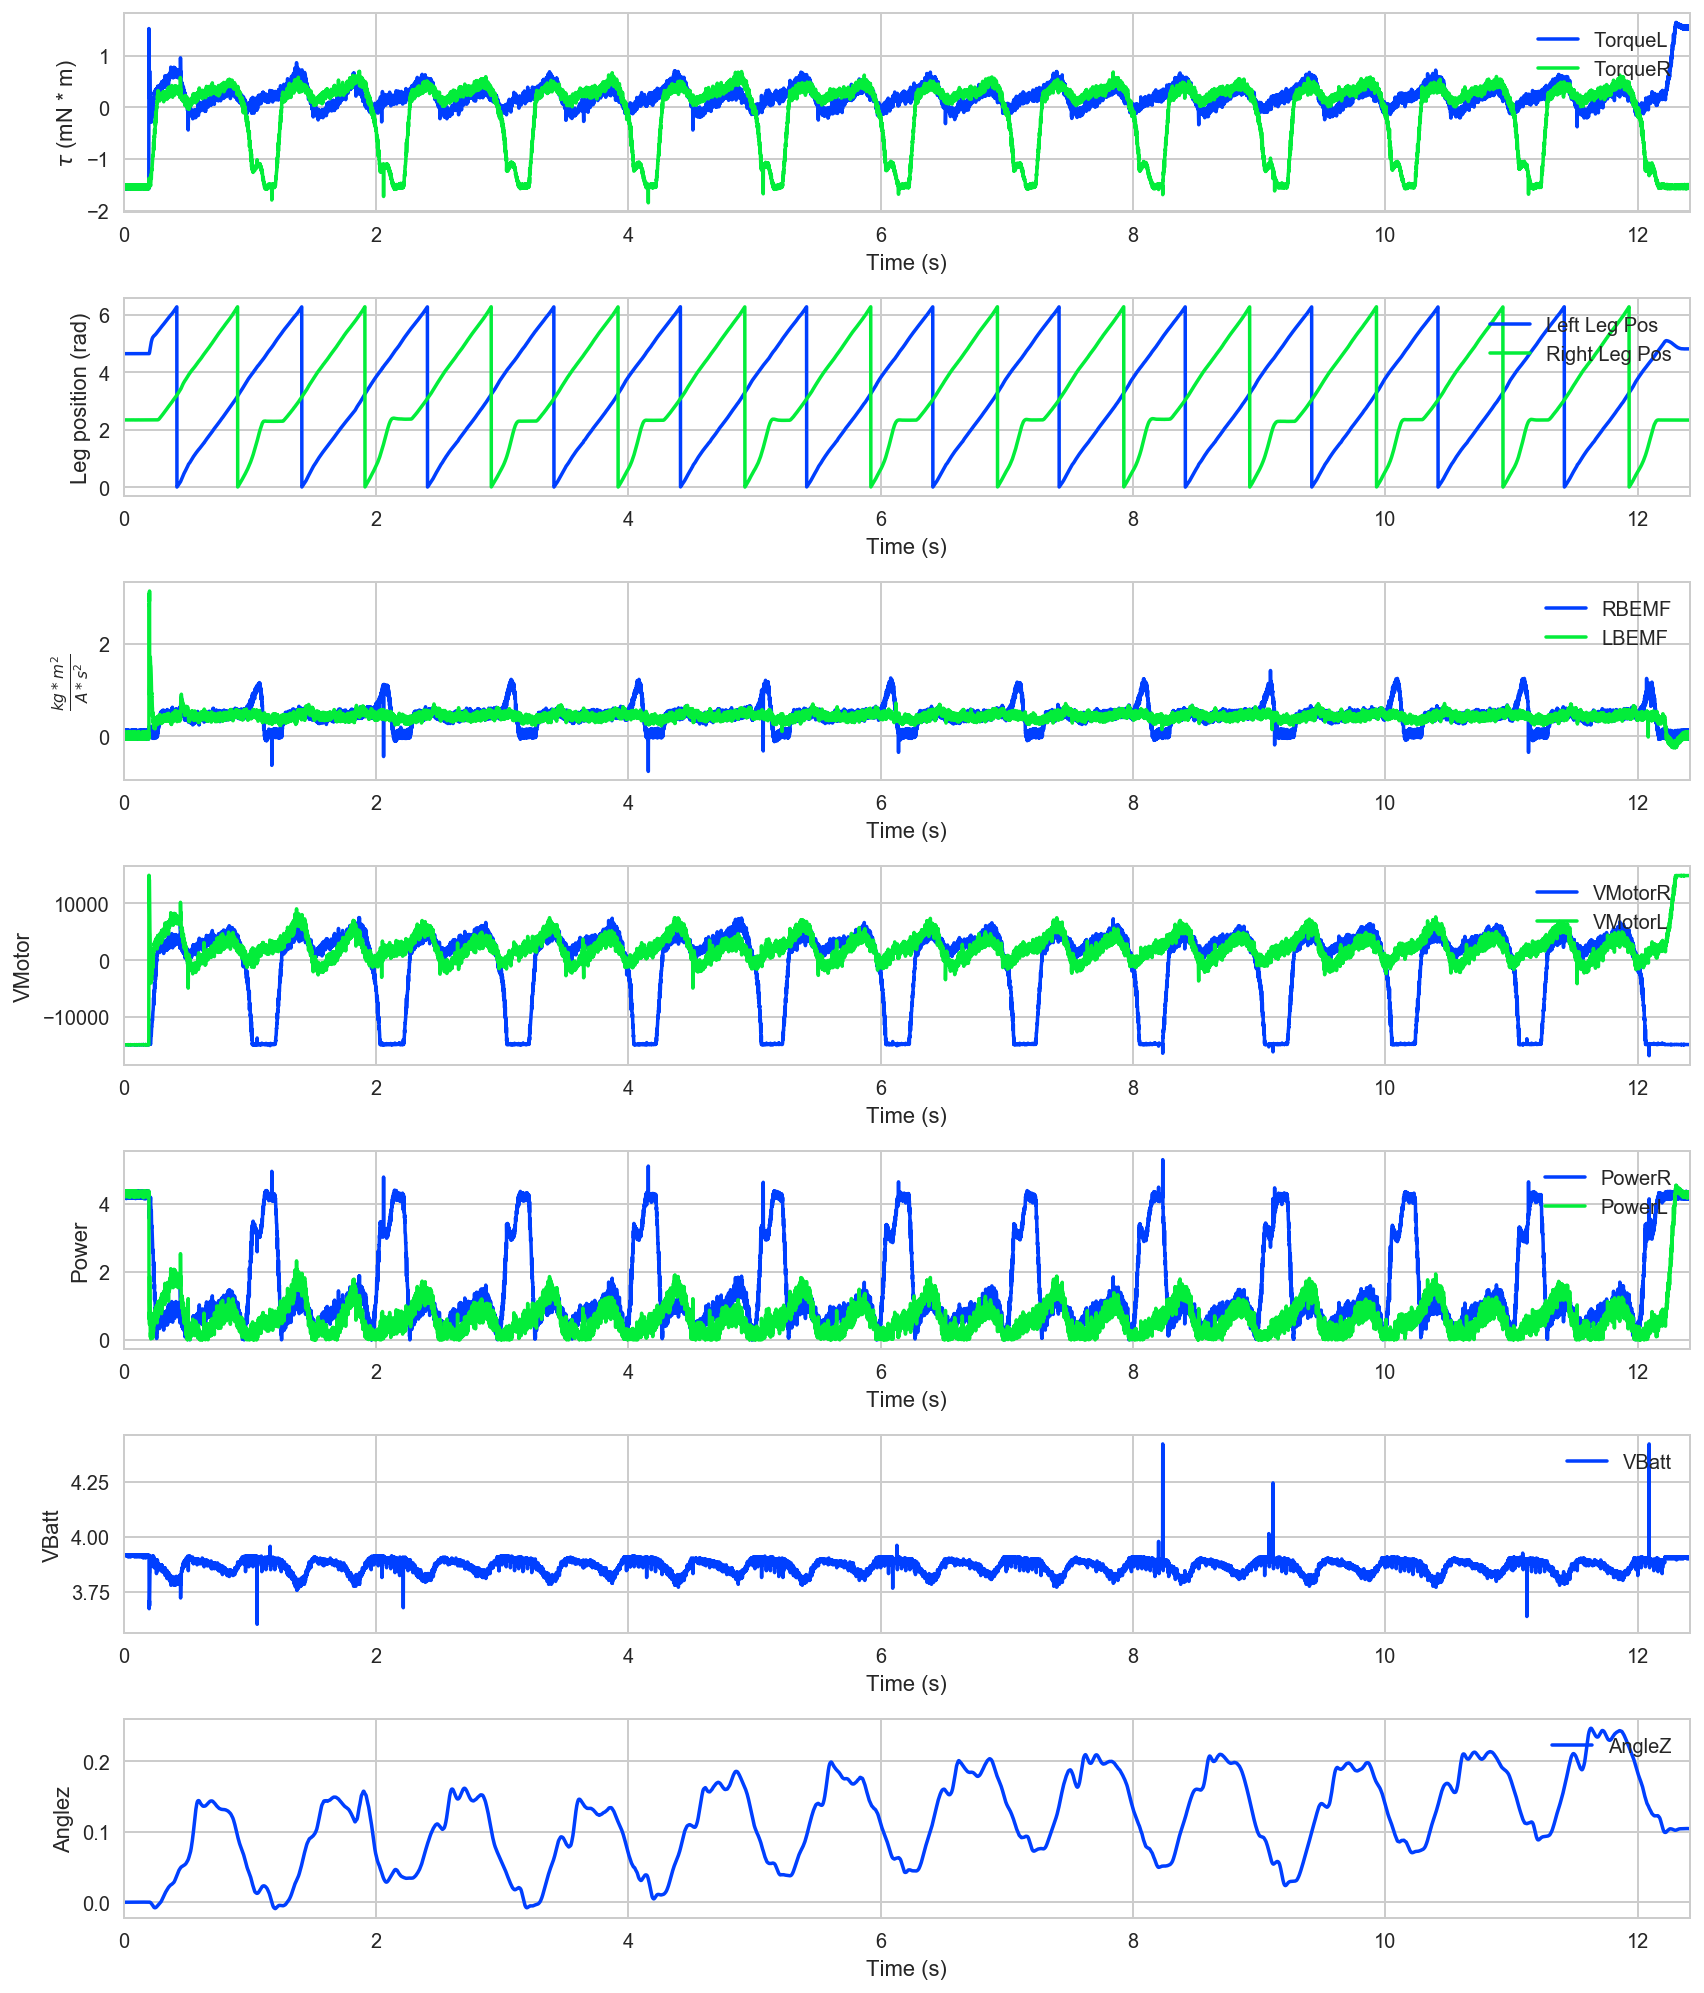

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

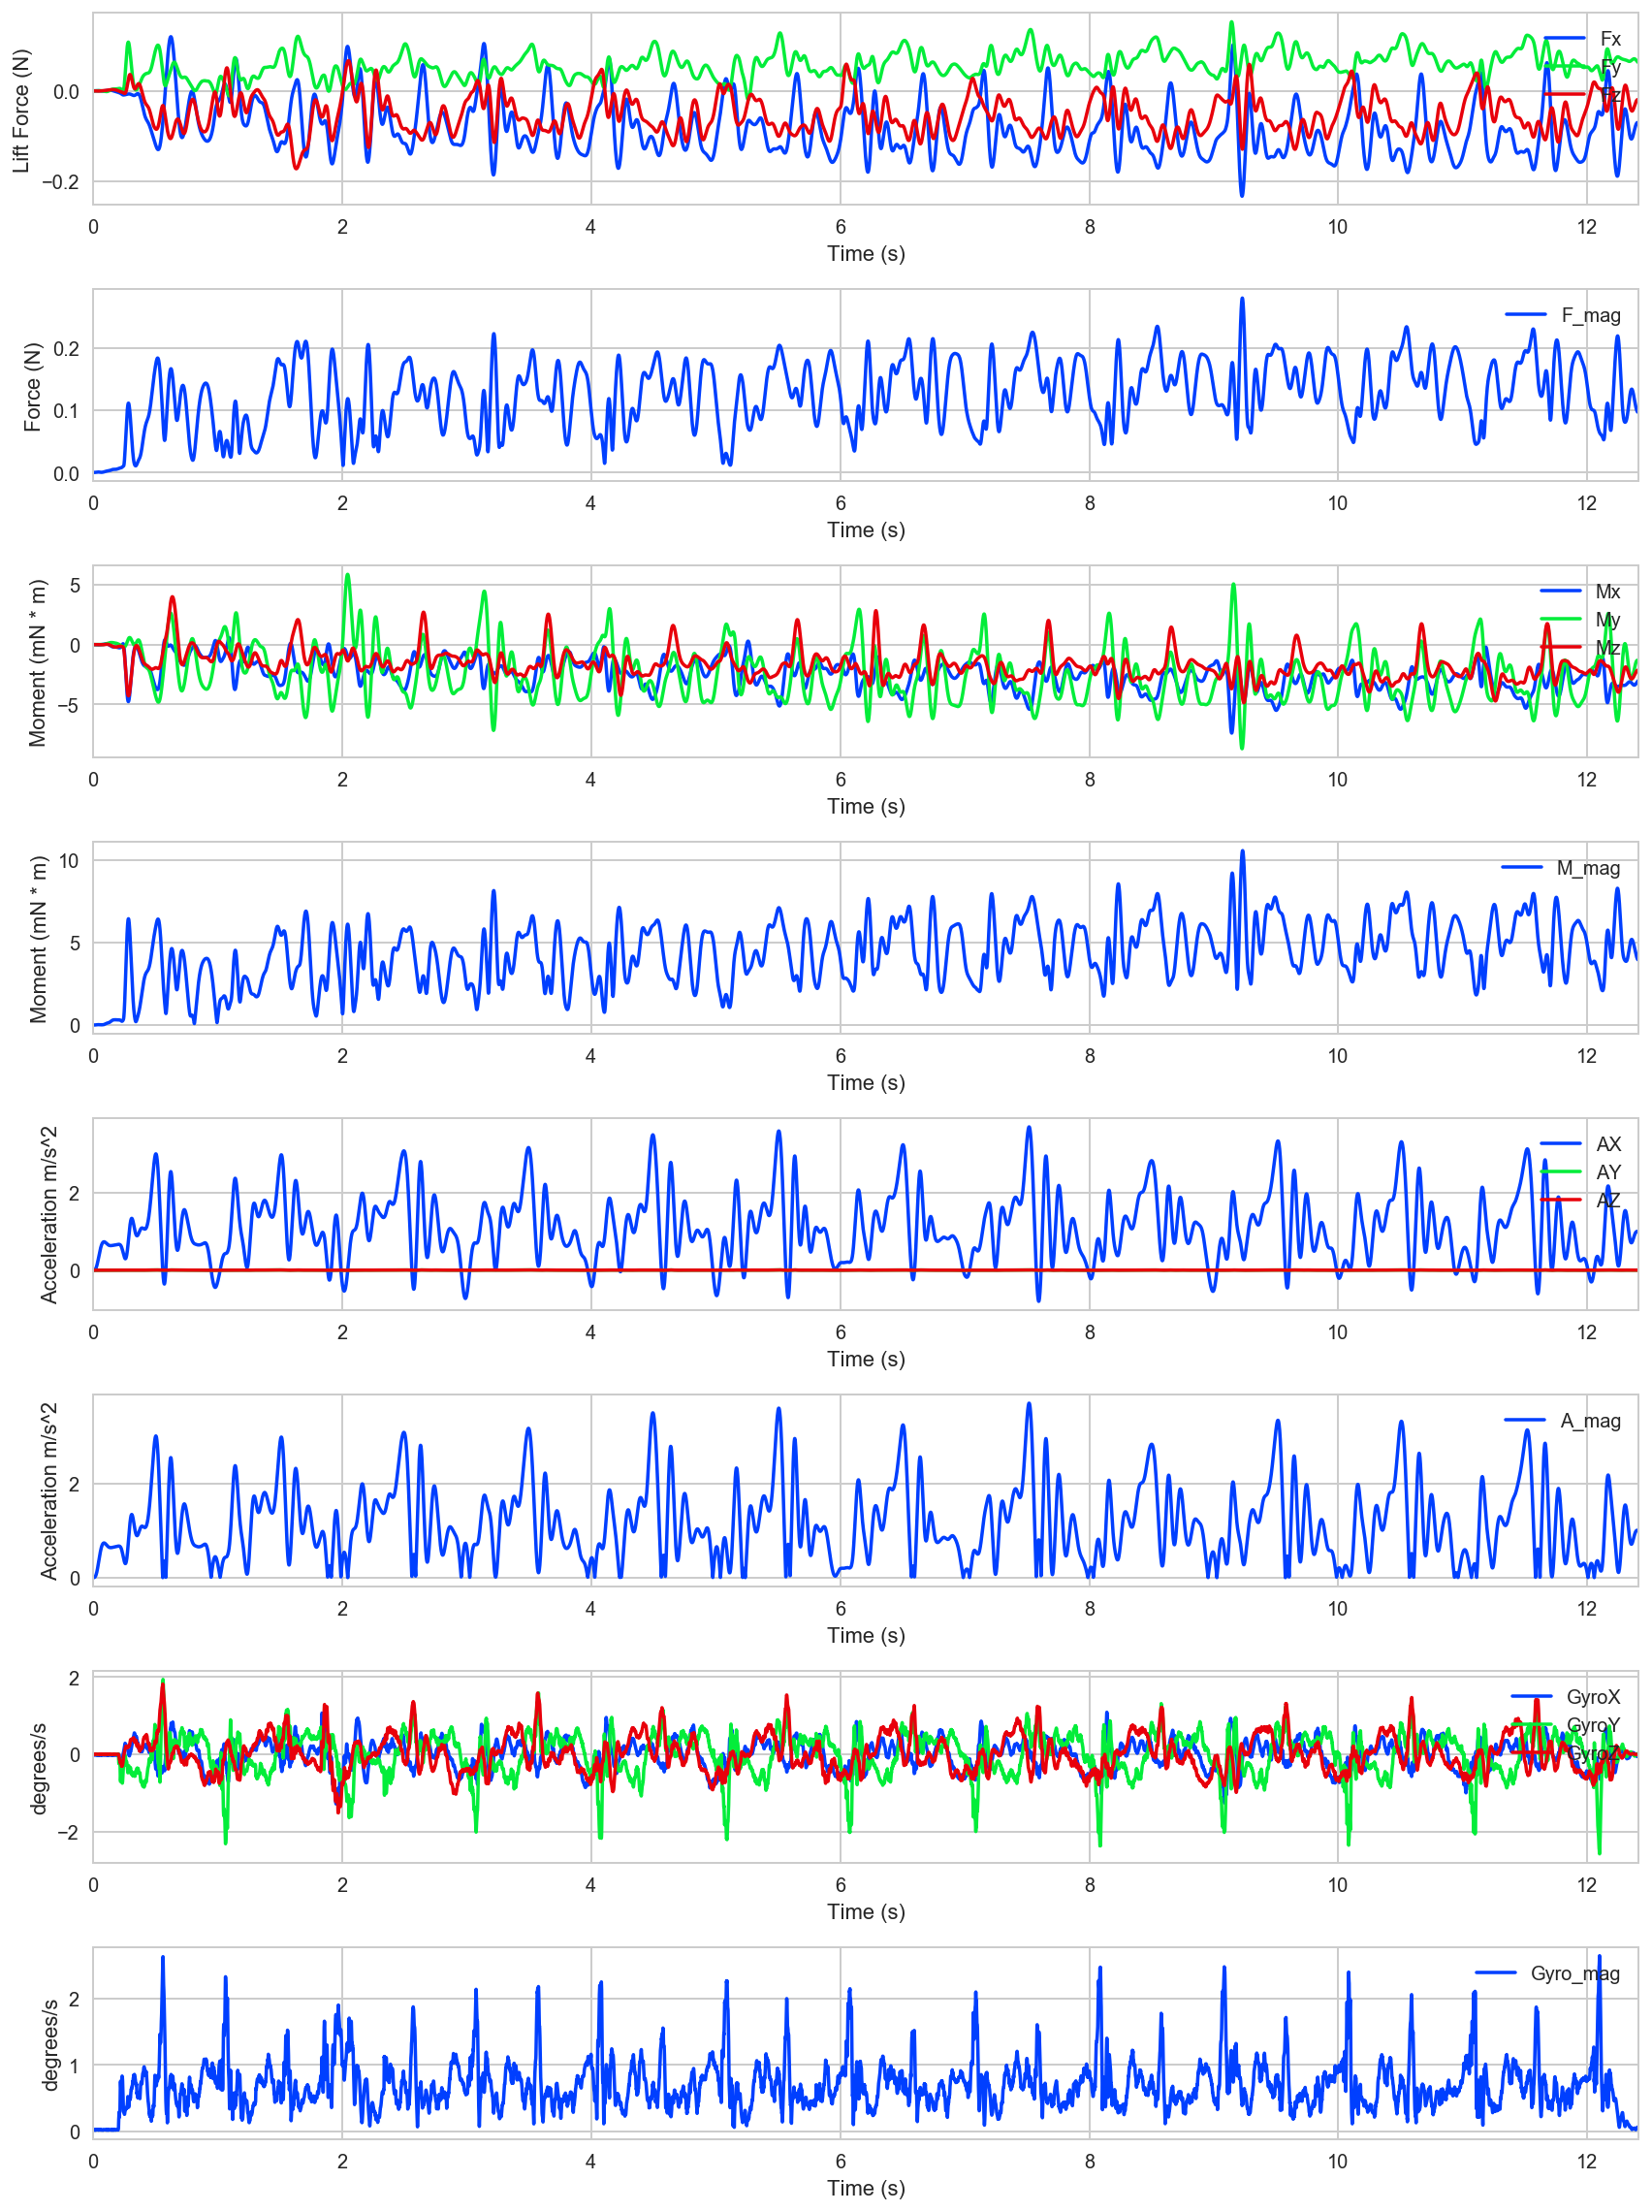

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

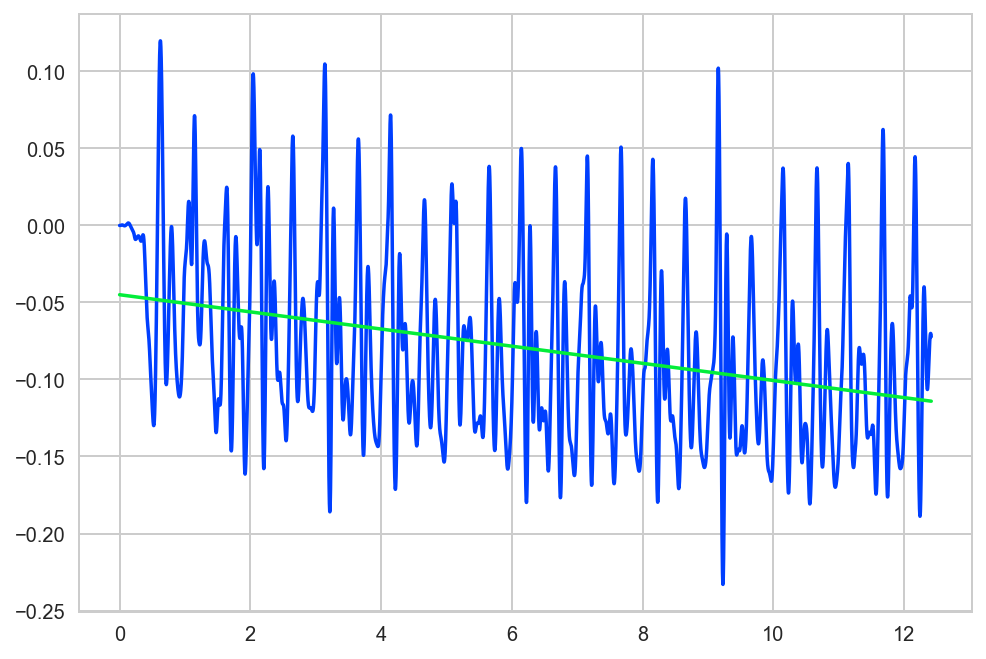

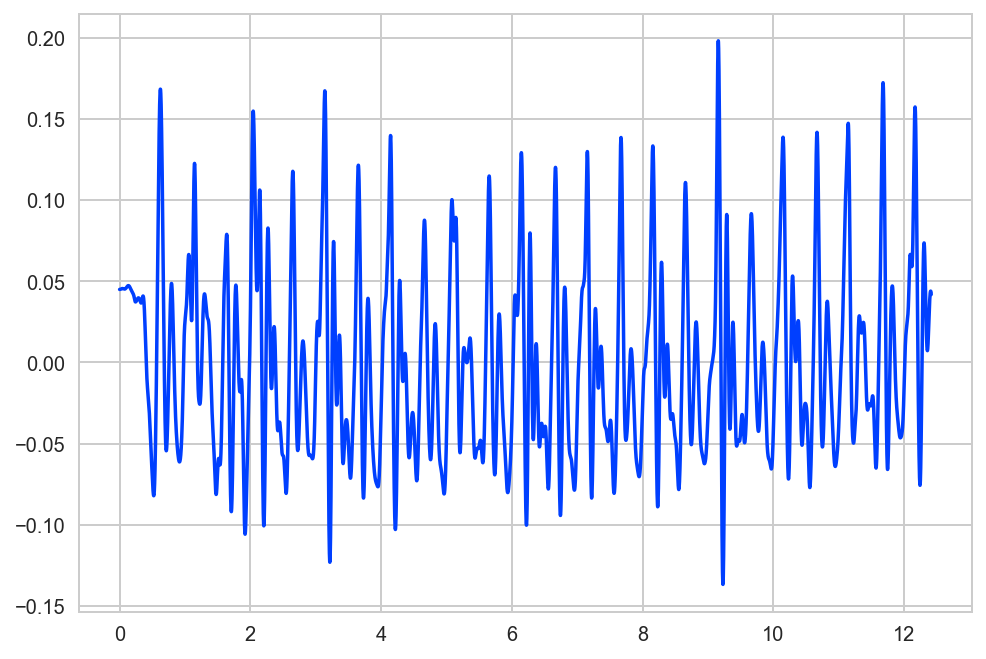

array([-0.0449694 , -0.04497497, -0.04498055, ..., -0.11408081,
       -0.11408638, -0.11409196])

In [6]:
utils.fit_line_to_single_column(df)

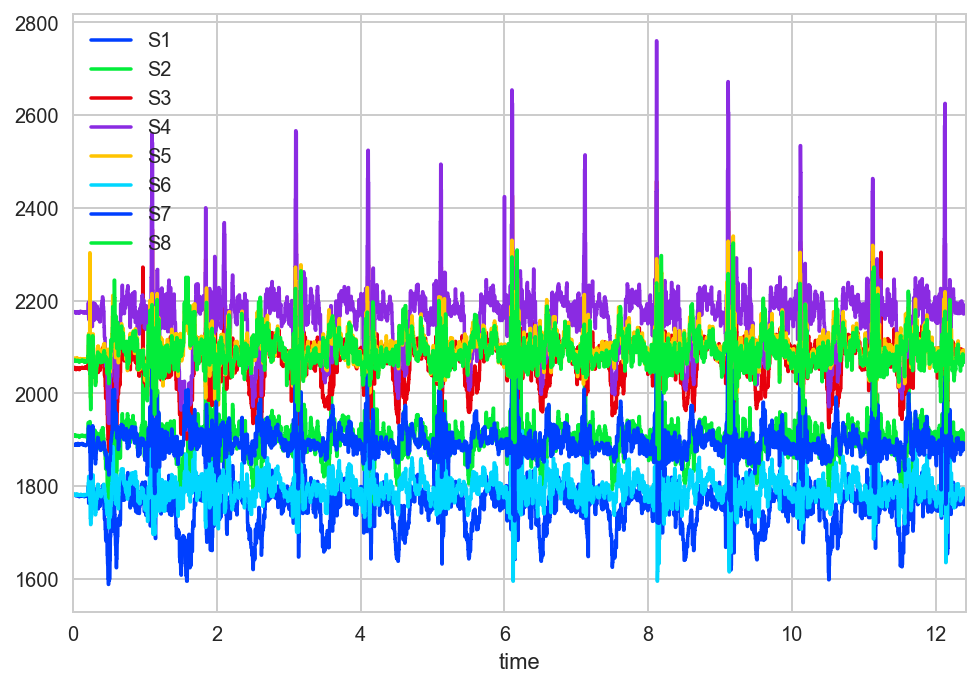

In [7]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=4000,end_time=8000)
print drag

drag energy (mJ): -21.8416287489
-21.8416287489


In [9]:
electrical_energy_cont = utils.calculate_electrical_energy_cont(df, start_time=4000,end_time=8000)
electrical_energy = utils.calculate_electrical_energy(df, start_time=4000, end_time=8000)

electrical energy cont(mJ): 8091.63497136
electrical energy (mJ): 8086.32012437


In [10]:
import numpy as np
start = df['Right Leg Pos'][3500:4500].argmax()
end = df['Right Leg Pos'][6500:7000].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

3913 6916
6.27743421893
6.28241980539
[[3913 4913]
 [4913 5913]
 [5913 6913]
 [6913 7913]]


In [11]:
drags = utils.get_drag_energy_from_list(df, False, intervals)

drag energy (mJ): -4.96805558286
drag energy (mJ): -5.2346018049
drag energy (mJ): -5.62835658334
drag energy (mJ): -5.96250496282
